Business Understanding: 
1) How does age impact how frequently an individual learns a new language or framework?
2) How does country impact how frequently an individual learns a new language or framework?
3) How does education level impact how frequently an individual learns a new language or framework?
4) How does employment status impact how frequently an individual learns a new language or framework?
5) How does job satisfaction impact how frequently an individual learns a new language or framework?
6) How does number of years coding impact how frequently an individual learns a new language or framework?

In [ ]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
import general_functions as gf
%matplotlib inline

Gather (see data_prep.ipynb for Assess and Clean Data steps)

In [1]:
df = pd.read_csv(r'reduced_data.csv', sep = ',', error_bad_lines = False, index_col = False)
df_schem = pd.read_csv(r'reduced_data_schema.csv', sep = ',', error_bad_lines = False, index_col = False)

Analyze: Begin Data Modeling/Evaluation

Create list of responses to how frequently a user learns a new language

In [2]:
df = df.dropna(subset = ['NEWLearn'])
df['NEWLearn'] = df['NEWLearn'].astype(str)
learn_resp = list(df['NEWLearn'].unique())
learn_resp

['Once a year', 'Once a decade', 'Every few months', 'Once every few years']

Create data frame of languages used sorted by total count

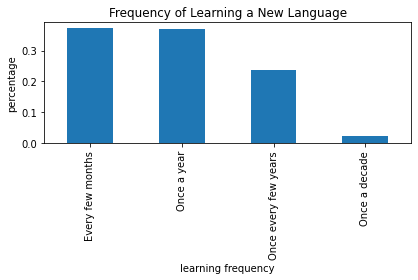

,count
learning frequency,
Every few months,0.372854
Once a year,0.368491
Once every few years,0.236555
Once a decade,0.022099


In [3]:
learn = df['NEWLearn'].value_counts().reset_index()
learn.rename(columns = {'index':'learning frequency','NEWLearn':'count'}, inplace = True)
learn_df = gf.total_count(learn,'learning frequency','count',learn_resp)
gf.bar_plotting(learn_df,'Frequency of Learning a New Language',plot = True)

Analyze: Comparing Age to Frequency Learning a New Language Responses

In [4]:
def age_bins(age):

    """
    FUNCTION: sort the given age in to the ocrrect age range (or bin)

    INPUTS:
        age - integer

    OUTPUTS:
        string describe the age bin the input was sorted in to
    """
    
    if age < 10 :
        return 'Under 10 Years'
    elif age >= 10 and age < 20:
        return '10-19 Years'
    elif age >= 20 and age < 30:
        return '20-29 Years'
    elif age >= 30 and age < 40:
        return '30-39 Years'
    elif age >= 40 and age < 50:
        return '40-49 Years'
    elif age >= 50 and age < 60:
        return '50-59 Years'
    elif age >= 60 and age < 70:
        return '60-69 Years'
    elif age >= 70 and age < 80:
        return '70-79 Years'
    else:
        return 'Over 80 Years'

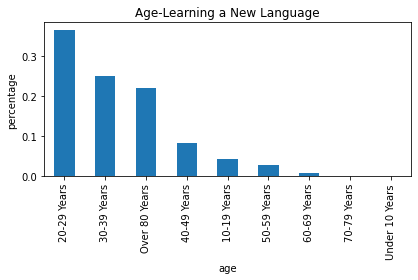

,count
age,
20-29 Years,0.365357
30-39 Years,0.249679
Over 80 Years,0.220742
40-49 Years,0.082983
10-19 Years,0.043272
50-59 Years,0.028421
60-69 Years,0.007924
70-79 Years,0.001496
Under 10 Years,0.000125


In [5]:
age_df = df['Age'].apply(age_bins).value_counts().reset_index()
age_df.rename(columns = {'index':'age','Age':'count'}, inplace = True)
df['AgeRanges'] = df['Age'].apply(age_bins)
gf.bar_plotting(age_df,'Age-Learning a New Language',plot = True)

In [6]:
range_1 = gf.percentage_breakdown(df[df['AgeRanges'] == 'Under 10 Years'], learn_resp, 'NEWLearn', 'Under 10 Years')
range_2 = gf.percentage_breakdown(df[df['AgeRanges'] == '10-19 Years'], learn_resp, 'NEWLearn', '10-19 Years')
range_3 = gf.percentage_breakdown(df[df['AgeRanges'] == '20-29 Years'], learn_resp, 'NEWLearn', '20-29 Years')
range_4 = gf.percentage_breakdown(df[df['AgeRanges'] == '30-39 Years'], learn_resp, 'NEWLearn', '30-39 Years')
range_5 = gf.percentage_breakdown(df[df['AgeRanges'] == '40-49 Years'], learn_resp, 'NEWLearn', '40-49 Years')
range_6 = gf.percentage_breakdown(df[df['AgeRanges'] == '50-59 Years'], learn_resp, 'NEWLearn', '50-59 Years')
range_7 = gf.percentage_breakdown(df[df['AgeRanges'] == '60-69 Years'], learn_resp, 'NEWLearn', '60-69 Years')
range_8 = gf.percentage_breakdown(df[df['AgeRanges'] == '70-79 Years'], learn_resp, 'NEWLearn', '70-79 Years')
range_9 = gf.percentage_breakdown(df[df['AgeRanges'] == 'Over 80 Years'], learn_resp, 'NEWLearn', 'Over 80 Years')

In [7]:
list_of_ranges = [range_1, range_2, range_3, range_4, range_5, range_6, range_7, range_8, range_9]
top_age_resp = pd.DataFrame(columns = ['Age Range','Frequency Learning a New Language'])
top_age_resp = gf.add_top_per_cat(top_age_resp, list_of_ranges)
top_age_resp

,Age Range,Frequency Learning a New Language
0,Under 10 Years,Every few months
1,10-19 Years,Every few months
2,20-29 Years,Every few months
3,30-39 Years,Once a year
4,40-49 Years,Once every few years
5,50-59 Years,Once every few years
6,60-69 Years,Once every few years
7,70-79 Years,Once every few years
8,Over 80 Years,Every few months


Visualize: Create a table comparing the percentage breakdown of frequency of learning a new language by age range and compare to the total breakdown

In [8]:
comp_df_2 = pd.merge(range_1, range_2, how = 'outer', left_index = True, right_index = True)
comp_df_2.columns = ['Under 10 Years', '10-19 Years']
for x in list_of_ranges[2:]:
    comp_df_2[x.columns[0]] = x
comp_df_2['Total'] = gf.percentage_breakdown(df, learn_resp, 'NEWLearn', 'Total')
comp_df_2 = comp_df_2.sort_values(by = ['Total'], ascending = False)
comp_df_2 = comp_df_2.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_2

,Under 10 Years,10-19 Years,20-29 Years,30-39 Years,40-49 Years,50-59 Years,60-69 Years,70-79 Years,Over 80 Years,Total
NEWLearn,,,,,,,,,,
Every few months,0.571429,0.556790,0.442609,0.270879,0.231116,0.202381,0.146067,0.119048,0.421668,0.372854
Once a year,0.285714,0.314815,0.386899,0.395478,0.332189,0.275063,0.231461,0.238095,0.349548,0.368491
Once every few years,0.142857,0.118519,0.160452,0.311604,0.390343,0.447995,0.512360,0.511905,0.204017,0.236555
Once a decade,nan,0.009877,0.010040,0.022038,0.046352,0.074561,0.110112,0.130952,0.024766,0.022099


Analyze: Comparing Countrty to Frequency Learning a New Language Responses

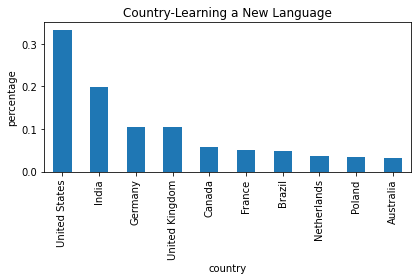

,count
country,
United States,0.333559
India,0.198760
Germany,0.105594
United Kingdom,0.103772
Canada,0.058585
France,0.050241
Brazil,0.047244
Netherlands,0.036726
Poland,0.033288


In [9]:
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns = {'index':'country','Country':'count'}, inplace = True)
country_df = country_df[:10]
gf.bar_plotting(country_df,'Country-Learning a New Language',plot=True)

In [10]:
country_resp = ['United States','India','Germany','United Kingdom','Canada','France','Brazil','Netherlands','Poland','Australia']

In [11]:
country_1 = gf.percentage_breakdown(df[df['Country'] == 'United States'], learn_resp, 'NEWLearn', 'United States')
country_2 = gf.percentage_breakdown(df[df['Country'] == 'India'], learn_resp, 'NEWLearn', 'India')
country_3 = gf.percentage_breakdown(df[df['Country'] == 'Germany'], learn_resp, 'NEWLearn', 'Germany')
country_4 = gf.percentage_breakdown(df[df['Country'] == 'United Kingdom'], learn_resp, 'NEWLearn', 'United Kingdom')
country_5 = gf.percentage_breakdown(df[df['Country'] == 'Canada'], learn_resp, 'NEWLearn', 'Canada')
country_6 = gf.percentage_breakdown(df[df['Country'] == 'France'], learn_resp, 'NEWLearn', 'France')
country_7 = gf.percentage_breakdown(df[df['Country'] == 'Brazil'], learn_resp, 'NEWLearn', 'Brazil')
country_8 = gf.percentage_breakdown(df[df['Country'] == 'Netherlands'], learn_resp, 'NEWLearn', 'Netherlands')
country_9 = gf.percentage_breakdown(df[df['Country'] == 'Poland'], learn_resp, 'NEWLearn', 'Poland')
country_10 = gf.percentage_breakdown(df[df['Country'] == 'Australia'], learn_resp, 'NEWLearn', 'Australia')

In [12]:
list_of_countries = [country_1, country_2, country_3, country_4, country_5, country_6, country_7, country_8, country_9, country_10]
top_country_resp = pd.DataFrame(columns = ['Country','Frequency Learning a New Language'])
top_country_resp = gf.add_top_per_cat(top_country_resp, list_of_countries)
top_country_resp

,Country,Frequency Learning a New Language
0,United States,Once a year
1,India,Every few months
2,Germany,Once a year
3,United Kingdom,Once a year
4,Canada,Once a year
5,France,Once a year
6,Brazil,Every few months
7,Netherlands,Once a year
8,Poland,Once a year
9,Australia,Once a year


Visualize: Create a table comparing the percentage breakdown of frequency of learning a new language by country and compare to the total breakdown

In [13]:
comp_df_3 = pd.merge(country_1, country_2, how = 'outer', left_index = True, right_index = True)
comp_df_3.columns = ['United States', 'India']
for x in list_of_countries[2:]:
    comp_df_3[x.columns[0]] = x
comp_df_3['Total'] = gf.percentage_breakdown(df, learn_resp, 'NEWLearn', 'Total')
comp_df_3 = comp_df_3.sort_values(by = ['Total'], ascending = False)
comp_df_3 = comp_df_3.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_3

,United States,India,Germany,United Kingdom,Canada,France,Brazil,Netherlands,Poland,Australia,Total
NEWLearn,,,,,,,,,,,
Every few months,0.311283,0.524169,0.331942,0.287939,0.356570,0.315789,0.442786,0.292800,0.353928,0.329991,0.372854
Once a year,0.387915,0.328603,0.388982,0.384768,0.370110,0.396491,0.358209,0.376800,0.421006,0.382862,0.368491
Once every few years,0.279309,0.130525,0.258765,0.297565,0.252758,0.263743,0.185945,0.296000,0.210062,0.261623,0.236555
Once a decade,0.021492,0.016704,0.020312,0.029728,0.020562,0.023977,0.013060,0.034400,0.015004,0.025524,0.022099


Analyze: Comparing Education Level to Frequency Learning a New Language Responses

In [14]:
ed_level_resp = list(df['EdLevel'].unique())
ed_level_resp

['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
 nan,
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
 'Professional degree (JD, MD, etc.)',
 'Some college/university study without earning a degree',
 'Associate degree (A.A., A.S., etc.)',
 'Other doctoral degree (Ph.D., Ed.D., etc.)',
 'Primary/elementary school',
 'I never completed any formal education']

c:\Users\Jessica\pj1_stackoverflow\pj1-stackoverflow\general_functions.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


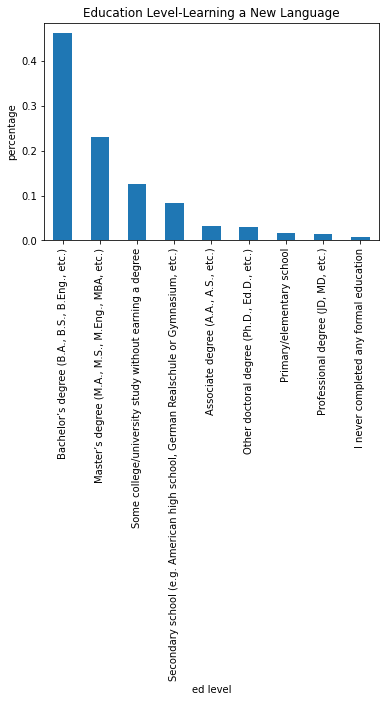

,count
ed level,
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.461687
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.230259
Some college/university study without earning a degree,0.126387
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.082431
"Associate degree (A.A., A.S., etc.)",0.032382
"Other doctoral degree (Ph.D., Ed.D., etc.)",0.030179
Primary/elementary school,0.015501
"Professional degree (JD, MD, etc.)",0.013643
I never completed any formal education,0.007530


In [15]:
ed_level_df = df['EdLevel'].value_counts().reset_index()
ed_level_df.rename(columns = {'index':'ed level','EdLevel':'count'}, inplace = True)
gf.bar_plotting(ed_level_df,'Education Level-Learning a New Language',plot = True)

In [16]:
level_1 = gf.percentage_breakdown(df[df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'], learn_resp, 'NEWLearn',                                          'Bachelor’s degree')
level_2 = gf.percentage_breakdown(df[df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'], learn_resp, 'NEWLearn',                                       'Master’s degree')
level_3 = gf.percentage_breakdown(df[df['EdLevel'] == 'Some college/university study without earning a degree'], learn_resp,                                            'NEWLearn', 'Some College/University')
level_4 = gf.percentage_breakdown(df[df['EdLevel'] ==
                                  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'], learn_resp,                                    'NEWLearn', 'Secondary school')
level_5 = gf.percentage_breakdown(df[df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'], learn_resp, 'NEWLearn', 
                                  'Associate degree')
level_6 = gf.percentage_breakdown(df[df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'], learn_resp, 'NEWLearn', 
                                  'Doctoral degree')
level_7 = gf.percentage_breakdown(df[df['EdLevel'] == 'Primary/elementary school'], learn_resp, 'NEWLearn', 
                                  'Primary/elementary school')
level_8 = gf.percentage_breakdown(df[df['EdLevel'] == 'Professional degree (JD, MD, etc.)'], learn_resp, 'NEWLearn', 
                                  'Professional degree')
level_9 = gf.percentage_breakdown(df[df['EdLevel'] == 'I never completed any formal education'], learn_resp, 'NEWLearn', 
                                  'No formal education')

In [17]:
list_of_ed_levels = [level_1, level_2, level_3, level_4, level_5, level_6, level_7, level_8, level_9]
top_ed_level_resp = pd.DataFrame(columns = ['EdLevel','Frequency Learning a New Language'])
top_ed_level_resp = gf.add_top_per_cat(top_ed_level_resp, list_of_ed_levels)
top_ed_level_resp

,EdLevel,Frequency Learning a New Language
0,Bachelor’s degree,Once a year
1,Master’s degree,Once a year
2,Some College/University,Every few months
3,Secondary school,Every few months
4,Associate degree,Every few months
5,Doctoral degree,Once every few years
6,Primary/elementary school,Every few months
7,Professional degree,Once a year
8,No formal education,Every few months


Visualize: Create a table comparing the percentage breakdown of frequency of learning a new language by education level and compare to the total breakdown

In [18]:
comp_df_4 = pd.merge(level_1, level_2, how = 'outer', left_index = True, right_index = True)
comp_df_4.columns = ['Bachelor’s degree', 'Master’s degree']
for x in list_of_ed_levels[2:]:
    comp_df_4[x.columns[0]] = x
comp_df_4['Total'] = gf.percentage_breakdown(df, learn_resp, 'NEWLearn', 'Total')
comp_df_4 = comp_df_4.sort_values(by = ['Total'], ascending = False)
comp_df_4 = comp_df_4.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_4

,Bachelor’s degree,Master’s degree,Some College/University,Secondary school,Associate degree,Doctoral degree,Primary/elementary school,Professional degree,No formal education,Total
NEWLearn,,,,,,,,,,
Every few months,0.372110,0.305484,0.407520,0.471874,0.373964,0.196190,0.479604,0.346910,0.483461,0.372854
Once a year,0.380286,0.378963,0.362796,0.337053,0.361538,0.343492,0.355995,0.360955,0.277354,0.368491
Once every few years,0.228512,0.290422,0.208308,0.176430,0.246746,0.407619,0.142151,0.252809,0.183206,0.236555
Once a decade,0.019091,0.025131,0.021377,0.014644,0.017751,0.052698,0.022250,0.039326,0.055980,0.022099


Analyze: Comparing Employment Status to Frequency Learning a New Language Responses

In [19]:
employ_resp = list(df['Employment'].unique())
employ_resp

['Independent contractor, freelancer, or self-employed',
 'Employed full-time',
 nan,
 'Student',
 'Not employed, but looking for work',
 'Employed part-time',
 'Retired',
 'Not employed, and not looking for work']

c:\Users\Jessica\pj1_stackoverflow\pj1-stackoverflow\general_functions.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


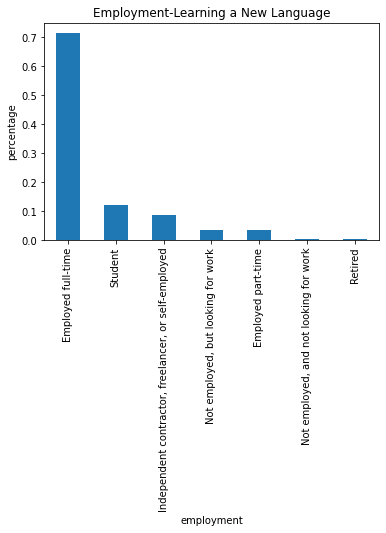

,count
employment,
Employed full-time,0.713775
Student,0.121091
"Independent contractor, freelancer, or self-employed",0.087370
"Not employed, but looking for work",0.035492
Employed part-time,0.033989
"Not employed, and not looking for work",0.004705
Retired,0.003578


In [20]:
employment_df = df['Employment'].value_counts().reset_index()
employment_df.rename(columns = {'index':'employment','Employment':'count'}, inplace = True)
gf.bar_plotting(employment_df,'Employment-Learning a New Language',plot=True)

In [21]:
emp_stat_1 = gf.percentage_breakdown(df[df['Employment'] == 'Employed full-time'], learn_resp, 'NEWLearn', 'Employed full-time')
emp_stat_2 = gf.percentage_breakdown(df[df['Employment'] == 'Independent contractor, freelancer, or self-employed'], learn_resp,                                           'NEWLearn', 'Independent contractor, freelancer, or self-employed')
emp_stat_3 = gf.percentage_breakdown(df[df['Employment'] == 'Employed part-time'], learn_resp, 'NEWLearn', 'Employed part-time')
emp_stat_4 = gf.percentage_breakdown(df[df['Employment'] == 'Not employed, but looking for work'], learn_resp, 'NEWLearn', 
                                     'Not employed, but looking for work')
emp_stat_5 = gf.percentage_breakdown(df[df['Employment'] == 'Not employed, and not looking for work'], learn_resp, 'NEWLearn', 
                                     'Not employed, and not looking for work')
emp_stat_6 = gf.percentage_breakdown(df[df['Employment'] == 'Retired'], learn_resp, 'NEWLearn', 'Retired')

In [22]:
list_of_emp = [emp_stat_1, emp_stat_2, emp_stat_3, emp_stat_4, emp_stat_5, emp_stat_6]
top_employment_resp = pd.DataFrame(columns = ['Employment','Frequency of Learning a New Language'])
top_employment_resp = gf.add_top_per_cat(top_employment_resp, list_of_emp)
top_employment_resp

,Employment,Frequency of Learning a New Language
0,Employed full-time,Once a year
1,"Independent contractor, freelancer, or self-em...",Every few months
2,Employed part-time,Every few months
3,"Not employed, but looking for work",Every few months
4,"Not employed, and not looking for work",Every few months
5,Retired,Once every few years


Visualize: Create a table comparing the percentage breakdown of frequency of learning a new language by employment status and compare to the total breakdown

In [23]:
comp_df_5 = pd.merge(emp_stat_1, emp_stat_2, how = 'outer', left_index = True, right_index = True)
comp_df_5.columns = ['Employed full-time', 'Independent contractor, freelancer, or self-employed']
for x in list_of_emp[2:]:
    comp_df_5[x.columns[0]] = x
comp_df_5['Total'] = gf.percentage_breakdown(df, learn_resp, 'NEWLearn', 'Total')
comp_df_5 = comp_df_5.sort_values(by = ['Total'], ascending = False)
comp_df_5 = comp_df_5.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_5

,Employed full-time,"Independent contractor, freelancer, or self-employed",Employed part-time,"Not employed, but looking for work","Not employed, and not looking for work",Retired,Total
NEWLearn,,,,,,,
Every few months,0.336867,0.372850,0.443158,0.506048,0.346008,0.140000,0.372854
Once a year,0.383183,0.332310,0.366316,0.295867,0.307985,0.205000,0.368491
Once every few years,0.258020,0.267199,0.170000,0.169859,0.292776,0.505000,0.236555
Once a decade,0.021930,0.027641,0.020526,0.028226,0.053232,0.150000,0.022099


Analyze: Comparing Job Satisfaction to Frequency Learning a New Language Responses

In [24]:
job_sat_resp = list(df['JobSat'].unique())
job_sat_resp

['Slightly satisfied',
 'Very dissatisfied',
 nan,
 'Slightly dissatisfied',
 'Very satisfied',
 'Neither satisfied nor dissatisfied']

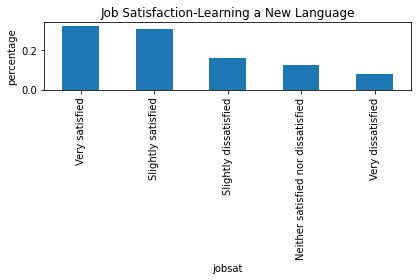

,count
jobsat,
Very satisfied,0.325484
Slightly satisfied,0.307698
Slightly dissatisfied,0.159070
Neither satisfied nor dissatisfied,0.125921
Very dissatisfied,0.081827


In [25]:
job_sat_df = df['JobSat'].value_counts().reset_index()
job_sat_df.rename(columns = {'index':'jobsat','JobSat':'count'}, inplace = True)
gf.bar_plotting(job_sat_df,'Job Satisfaction-Learning a New Language',plot = True)

In [26]:
job_sat_1 = gf.percentage_breakdown(df[df['JobSat'] == 'Very satisfied'], learn_resp, 'NEWLearn', 'Very satisfied')
job_sat_2 = gf.percentage_breakdown(df[df['JobSat'] == 'Slightly satisfied'], learn_resp, 'NEWLearn', 'Slightly satisfied')
job_sat_3 = gf.percentage_breakdown(df[df['JobSat'] == 'Slightly dissatisfied'], learn_resp, 'NEWLearn', 'Slightly dissatisfied')
job_sat_4 = gf.percentage_breakdown(df[df['JobSat'] == 'Neither satisfied nor dissatisfied'], learn_resp, 'NEWLearn', 
                                    'Neither satisfied nor dissatisfied')
job_sat_5 = gf.percentage_breakdown(df[df['JobSat'] == 'Very dissatisfied'], learn_resp, 'NEWLearn', 'Very dissatisfied')

In [27]:
list_of_job_sat = [job_sat_1, job_sat_2, job_sat_3, job_sat_4, job_sat_5]
top_job_sat_resp = pd.DataFrame(columns = ['JobSat','Frequency of Learning a New Language'])
top_job_sat_resp = gf.add_top_per_cat(top_job_sat_resp, list_of_job_sat)
top_job_sat_resp

,JobSat,Frequency of Learning a New Language
0,Very satisfied,Once a year
1,Slightly satisfied,Once a year
2,Slightly dissatisfied,Once a year
3,Neither satisfied nor dissatisfied,Once a year
4,Very dissatisfied,Every few months


Visualize: Create a table comparing the percentage breakdown of frequency of learning a new language by job satisfaction and compare to the total breakdown

In [28]:
comp_df_6 = pd.merge(job_sat_1, job_sat_2, how = 'outer', left_index = True, right_index = True)
comp_df_6.columns = ['Very satisfied', 'Slightly satisfied']
for x in list_of_job_sat[2:]:
    comp_df_6[x.columns[0]] = x
comp_df_6['Total'] = gf.percentage_breakdown(df, learn_resp, 'NEWLearn', 'Total')
comp_df_6 = comp_df_6.sort_values(by = ['Total'], ascending = False)
comp_df_6 = comp_df_6.style.apply(lambda x: ['background: green' if v >= (1.3*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.15*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.85*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_6

,Very satisfied,Slightly satisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Very dissatisfied,Total
NEWLearn,,,,,,
Every few months,0.336799,0.329667,0.330768,0.343309,0.368436,0.372854
Once a year,0.376475,0.397145,0.388562,0.378765,0.353183,0.368491
Once every few years,0.263569,0.253452,0.261053,0.258292,0.251100,0.236555
Once a decade,0.023156,0.019736,0.019617,0.019634,0.027281,0.022099


Analyze: Comparing Years of Coding to Frequency Learning a New Language Responses

In [29]:
def yr_bin(yrs):

    """
    FUNCTION: sort the given years of coding in to the correct time range

    INPUTS:
        yrs - string describing number of years coding

    OUTPUTS:
        string describe the time range the input was sorted in to
    """
    
    if yrs == 'Less than 1 year' :
        return 'Less than 1 year'
    elif yrs in ['1','2','3','4','5','6','7','8','9']:
        return '1-9 Years'
    elif yrs in ['10', '11', '12','13','14','15','16','17','18','19']:
        return '10-19 Years'
    elif yrs in ['20', '21', '22','23','24','25','26','27','28','29']:
        return '20-29 Years'
    elif yrs in ['30', '31', '32','33','34','35','36','37','38','39']:
        return '30-39 Years'
    elif yrs in ['40', '41', '42','43','44','45','46','47','48','49', '50']:
        return '40-50 Years'
    else:
        return 'More than 50 years'

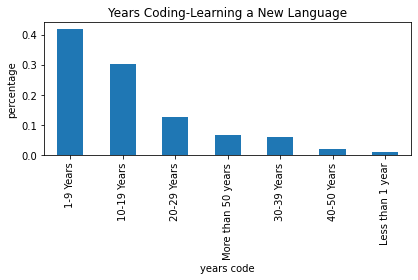

,count
years code,
1-9 Years,0.419385
10-19 Years,0.301019
20-29 Years,0.124884
More than 50 years,0.064624
30-39 Years,0.059887
40-50 Years,0.019962
Less than 1 year,0.010239


In [30]:
yr_code_df = df['YearsCode'].apply(yr_bin).value_counts().reset_index()
yr_code_df.rename(columns = {'index':'years code','YearsCode':'count'}, inplace = True)
df['YearsCode Ranges'] = df['YearsCode'].apply(yr_bin)
gf.bar_plotting(yr_code_df,'Years Coding-Learning a New Language',plot = True)

In [31]:
yr_1 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '1-9 Years'], learn_resp, 'NEWLearn', '1-9 Years')
yr_2 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '10-19 Years'], learn_resp, 'NEWLearn', '10-19 Years')
yr_3 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '20-29 Years'], learn_resp, 'NEWLearn', '20-29 Years')
yr_4 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '30-39 Years'], learn_resp, 'NEWLearn', '30-39 Years')
yr_5 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '40-50 Years'], learn_resp, 'NEWLearn', '40-50 Years')
yr_6 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == 'More than 50 years'], learn_resp, 'NEWLearn', 'More than 50 years')
yr_7 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == 'Less than 1 year'], learn_resp, 'NEWLearn', 'Less than 1 year')

In [32]:
list_of_yrs = [yr_1, yr_2, yr_3, yr_4, yr_5, yr_6, yr_7]
top_yrs_resp = pd.DataFrame(columns = ['YearCode Ranges','Frequency of Learning a New Language'])
top_yrs_resp = gf.add_top_per_cat(top_yrs_resp, list_of_yrs)
top_yrs_resp

,YearCode Ranges,Frequency of Learning a New Language
0,1-9 Years,Every few months
1,10-19 Years,Once a year
2,20-29 Years,Once a year
3,30-39 Years,Once every few years
4,40-50 Years,Once every few years
5,More than 50 years,Every few months
6,Less than 1 year,Every few months


Visualize: Create a table comparing the percentage breakdown of frequency of learning a new language by years of coding and compare to the total breakdown

In [33]:
comp_df_7 = pd.merge(yr_1, yr_2, how = 'outer', left_index = True, right_index = True)
comp_df_7.columns = ['1-9 Years', '10-19 Years']
for x in list_of_yrs[2:]:
    comp_df_7[x.columns[0]] = x
comp_df_7['Total'] = gf.percentage_breakdown(df, learn_resp, 'NEWLearn', 'Total')
comp_df_7 = comp_df_7.sort_values(by = ['Total'], ascending = False)
comp_df_7 = comp_df_7.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_7

,1-9 Years,10-19 Years,20-29 Years,30-39 Years,40-50 Years,More than 50 years,Less than 1 year,Total
NEWLearn,,,,,,,,
Every few months,0.459726,0.324302,0.249251,0.223610,0.189117,0.438137,0.568696,0.372854
Once a year,0.371322,0.394108,0.359618,0.323521,0.272971,0.340314,0.234783,0.368491
Once every few years,0.156002,0.264020,0.357622,0.399346,0.459411,0.193717,0.135652,0.236555
Once a decade,0.012951,0.017570,0.033509,0.053524,0.078501,0.027831,0.060870,0.022099
